In [1]:
%matplotlib inline
import numpy as np
import scipy as sp 
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
n=100 # number of grid nodes
dx=1/n # discretization step, domain size = 1
eps1 = 13 # two layers of equal size forming band gap
eps2 = 1 # two layers of equal size forming band gap
num_eigs = 6

In [3]:
kk0 = 2*sp.pi*np.arange(0.01,0.501,0.005) # k-vector in medium with eps1-eps2

c = np.ones((1,n))/dx # column-vector to construct 1d differential operator
F = sp.sparse.spdiags(np.vstack((-c, c)), np.array([0, 1]), n, n) # forward difference matrix
F = sp.sparse.lil_matrix(F) # change from diagonal type to csr to accsess single elements in sparse matrix

epscol = np.ones((1,n/2))/eps1 
epscol=np.append(epscol,np.ones((1,n/2))/eps2) # column-vector to construct 1/eps array
epsinv = sp.sparse.spdiags(epscol, 0, n, n) # to arrange diagonal matrix for 1/eps
k = np.zeros((6, kk0.size), dtype=complex)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


In [4]:
for ik in range(kk0.size):
    k0=kk0[ik]
     
    F[n-1,0] = np.cos(k0*1)/dx # to impose periodic boundary conditions    
    B = -sp.sparse.lil_matrix.transpose(F) # backward difference matrix

    q = -epsinv*B*F # to assemble eigenmatrix

    kt = k0/np.sqrt((eps1+eps2)/2); # target k=w/c
    k2, V = linalg.eigs(q, k=num_eigs, M=None, sigma=kt**2)
    
    k[:,ik] = np.sqrt(k2) # k=w/c

lam = 2*sp.pi/np.real(k)
# Q = np.real(k)/(2*np.imag(k))

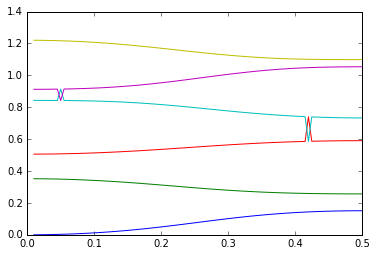

In [5]:
for i in range(num_eigs):
    plt.hold(True)
    plt.plot(kk0/(2*sp.pi), np.real(k[i,:]/(2*sp.pi)) ,'-')

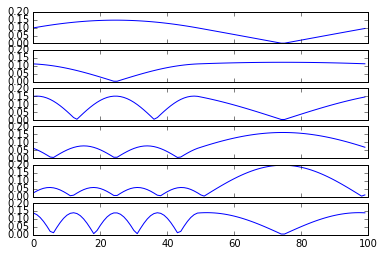

In [6]:
f, ax = plt.subplots(6,1, sharex=True, sharey=True)

for i in range(num_eigs):
    ax[i].plot(np.abs(V[:,i]),'-')